In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

426472/426472 [==============================] - 24s 56us/step - loss: 18.3089 - rec_loss: 29.5208 - kl_loss: 5.0297 - val_loss: 16.0260 - val_rec_loss: 28.0524 - val_kl_loss: 3.0283
Epoch 17/150
426472/426472 [==============================] - 24s 55us/step - loss: 18.1158 - rec_loss: 29.2037 - kl_loss: 5.0203 - val_loss: 16.5602 - val_rec_loss: 29.1634 - val_kl_loss: 3.0119
Epoch 18/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.9489 - rec_loss: 28.8959 - kl_loss: 5.0188 - val_loss: 15.3781 - val_rec_loss: 26.8365 - val_kl_loss: 2.9819
Epoch 19/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.8138 - rec_loss: 28.6770 - kl_loss: 5.0174 - val_loss: 14.7557 - val_rec_loss: 25.6293 - val_kl_loss: 2.9741
Epoch 20/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.8539 - rec_loss: 28.7875 - kl_loss: 5.0043 - val_loss: 15.0822 - val_rec_loss: 26.2693 - val_kl_loss: 2.9937
Epoch 21/150
426472/426472 [=====

426472/426472 [==============================] - 24s 55us/step - loss: 16.4271 - rec_loss: 26.3107 - kl_loss: 5.0243 - val_loss: 14.8321 - val_rec_loss: 25.9367 - val_kl_loss: 2.9772
Epoch 58/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.4455 - rec_loss: 26.3444 - kl_loss: 5.0277 - val_loss: 14.9835 - val_rec_loss: 26.2819 - val_kl_loss: 2.9429
Epoch 59/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.3702 - rec_loss: 26.2072 - kl_loss: 5.0207 - val_loss: 14.6014 - val_rec_loss: 25.3939 - val_kl_loss: 3.0548
Epoch 60/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.3436 - rec_loss: 26.1658 - kl_loss: 5.0155 - val_loss: 14.6319 - val_rec_loss: 25.5019 - val_kl_loss: 3.0197
Epoch 61/150
426472/426472 [==============================] - 24s 55us/step - loss: 16.4266 - rec_loss: 26.3109 - kl_loss: 5.0286 - val_loss: 15.3566 - val_rec_loss: 27.0225 - val_kl_loss: 2.9539
Epoch 62/150
426472/426472 [=====

Epoch 99/150
426472/426472 [==============================] - 23s 55us/step - loss: 17.4417 - rec_loss: 28.1712 - kl_loss: 5.0835 - val_loss: 16.9336 - val_rec_loss: 29.9430 - val_kl_loss: 3.0629
Epoch 100/150
426472/426472 [==============================] - 24s 55us/step - loss: 17.3181 - rec_loss: 27.9095 - kl_loss: 5.0894 - val_loss: 20.4286 - val_rec_loss: 36.9675 - val_kl_loss: 3.0312
Epoch 101/150
426472/426472 [==============================] - 24s 55us/step - loss: 17.3115 - rec_loss: 27.8650 - kl_loss: 5.1048 - val_loss: 16.9011 - val_rec_loss: 29.8574 - val_kl_loss: 3.0658
Epoch 102/150
426472/426472 [==============================] - 24s 55us/step - loss: 17.2706 - rec_loss: 27.7827 - kl_loss: 5.1026 - val_loss: 19.0033 - val_rec_loss: 34.1134 - val_kl_loss: 3.0168
Epoch 103/150
426472/426472 [==============================] - 24s 55us/step - loss: 17.1575 - rec_loss: 27.5700 - kl_loss: 5.0964 - val_loss: 15.1001 - val_rec_loss: 26.2454 - val_kl_loss: 3.0953
Epoch 104/150
42

426472/426472 [==============================] - 24s 56us/step - loss: 17.0088 - rec_loss: 27.1299 - kl_loss: 5.2165 - val_loss: 18.9761 - val_rec_loss: 33.7900 - val_kl_loss: 3.2791
Epoch 141/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.9941 - rec_loss: 27.1100 - kl_loss: 5.2072 - val_loss: 17.7860 - val_rec_loss: 31.4782 - val_kl_loss: 3.2085
Epoch 142/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.8645 - rec_loss: 26.8631 - kl_loss: 5.1923 - val_loss: 15.9190 - val_rec_loss: 27.6807 - val_kl_loss: 3.2657
Epoch 143/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.7890 - rec_loss: 26.7114 - kl_loss: 5.1927 - val_loss: 19.4347 - val_rec_loss: 34.9981 - val_kl_loss: 2.9983
Epoch 144/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.6802 - rec_loss: 26.5448 - kl_loss: 5.1544 - val_loss: 18.4794 - val_rec_loss: 33.0945 - val_kl_loss: 2.9684
Epoch 145/150
426472/426472 [

426472/426472 [==============================] - 78s 183us/step - loss: 0.0351 - accuracy: 0.9874 - val_loss: 0.0393 - val_accuracy: 0.9804
Epoch 41/50
426472/426472 [==============================] - 83s 194us/step - loss: 0.0349 - accuracy: 0.9873 - val_loss: 0.0414 - val_accuracy: 0.9799
Epoch 42/50
426472/426472 [==============================] - 83s 195us/step - loss: 0.0351 - accuracy: 0.9872 - val_loss: 0.0401 - val_accuracy: 0.9804
Epoch 43/50
426472/426472 [==============================] - 83s 195us/step - loss: 0.0350 - accuracy: 0.9873 - val_loss: 0.0409 - val_accuracy: 0.9800
Epoch 44/50
426472/426472 [==============================] - 81s 191us/step - loss: 0.0346 - accuracy: 0.9875 - val_loss: 0.0416 - val_accuracy: 0.9798
Epoch 45/50
426472/426472 [==============================] - 82s 192us/step - loss: 0.0346 - accuracy: 0.9874 - val_loss: 0.0403 - val_accuracy: 0.9797
Epoch 46/50
426472/426472 [==============================] - 83s 195us/step - loss: 0.0349 - accurac

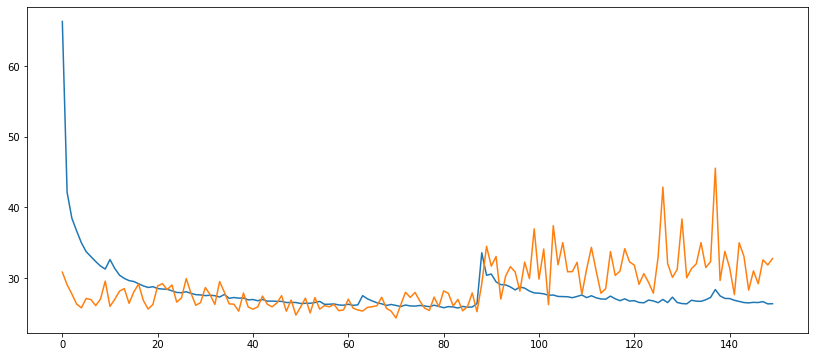

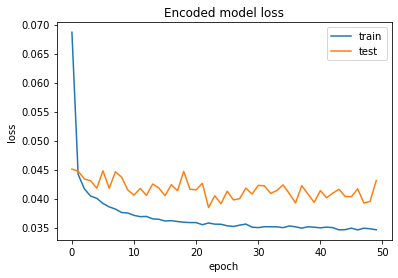

Overall accuracy of Convolutional Neural Network model: 0.9793826016123143


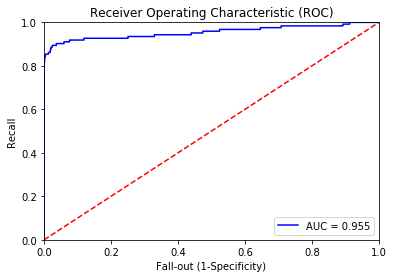

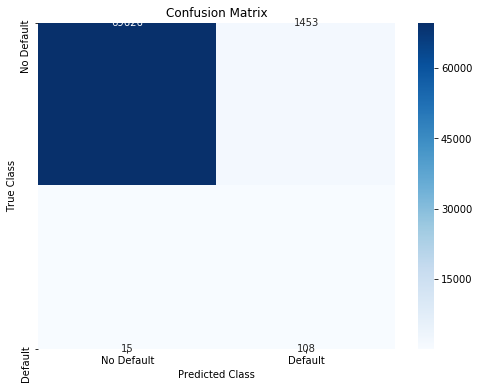

AUC(ROC): 0.9288033685638
Precision: 0.06918641896220372
Recall: 0.8780487804878049
F1 score: 0.12826603325415678
False positives: 1453
True positives: 108
False negatives: 15
True negatives: 69626
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

426472/426472 [==============================] - 24s 56us/step - loss: 17.4991 - rec_loss: 28.3556 - kl_loss: 4.8440 - val_loss: 13.7638 - val_rec_loss: 23.6917 - val_kl_loss: 3.0532
Epoch 17/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.3426 - rec_loss: 28.0687 - kl_loss: 4.8554 - val_loss: 14.1720 - val_rec_loss: 24.6374 - val_kl_loss: 2.9369
Epoch 18/150
426472/426472 [==============================] - 24s 57us/step - loss: 17.2474 - rec_loss: 27.9008 - kl_loss: 4.8685 - val_loss: 13.5026 - val_rec_loss: 23.2885 - val_kl_loss: 2.9750
Epoch 19/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.1731 - rec_loss: 27.7534 - kl_loss: 4.8891 - val_loss: 13.9683 - val_rec_loss: 24.2024 - val_kl_loss: 2.9908
Epoch 20/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.0753 - rec_loss: 27.5708 - kl_loss: 4.8893 - val_loss: 13.7369 - val_rec_loss: 23.7105 - val_kl_loss: 3.0201
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.0856 - rec_loss: 25.7940 - kl_loss: 4.9403 - val_loss: 13.1802 - val_rec_loss: 22.6661 - val_kl_loss: 3.0489
Epoch 59/150
426472/426472 [==============================] - 24s 55us/step - loss: 16.0696 - rec_loss: 25.7688 - kl_loss: 4.9322 - val_loss: 13.2033 - val_rec_loss: 22.7140 - val_kl_loss: 3.0407
Epoch 60/150
426472/426472 [==============================] - 24s 57us/step - loss: 16.0286 - rec_loss: 25.6799 - kl_loss: 4.9361 - val_loss: 13.4694 - val_rec_loss: 23.1352 - val_kl_loss: 3.1444
Epoch 61/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.3611 - rec_loss: 26.3440 - kl_loss: 4.9438 - val_loss: 13.1992 - val_rec_loss: 22.6914 - val_kl_loss: 3.0622
Epoch 62/150
426472/426472 [==============================] - 24s 57us/step - loss: 16.3098 - rec_loss: 26.2563 - kl_loss: 4.9385 - val_loss: 13.1131 - val_rec_loss: 22.5494 - val_kl_loss: 3.0402
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.7903 - rec_loss: 25.2409 - kl_loss: 4.9575 - val_loss: 13.0290 - val_rec_loss: 22.4258 - val_kl_loss: 2.9777
Epoch 101/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.8079 - rec_loss: 25.2710 - kl_loss: 4.9619 - val_loss: 13.2205 - val_rec_loss: 22.6611 - val_kl_loss: 3.1085
Epoch 102/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.7648 - rec_loss: 25.2015 - kl_loss: 4.9504 - val_loss: 13.0319 - val_rec_loss: 22.3666 - val_kl_loss: 3.0424
Epoch 103/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.7951 - rec_loss: 25.2470 - kl_loss: 4.9676 - val_loss: 13.1282 - val_rec_loss: 22.5462 - val_kl_loss: 3.0523
Epoch 104/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.8272 - rec_loss: 25.3057 - kl_loss: 4.9597 - val_loss: 13.1320 - val_rec_loss: 22.5414 - val_kl_loss: 3.0538
Epoch 105/150
4

426472/426472 [==============================] - 24s 56us/step - loss: 15.8254 - rec_loss: 25.2457 - kl_loss: 5.0270 - val_loss: 13.2216 - val_rec_loss: 22.6931 - val_kl_loss: 3.0730
Epoch 142/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.8203 - rec_loss: 25.2464 - kl_loss: 5.0152 - val_loss: 13.2713 - val_rec_loss: 22.5991 - val_kl_loss: 3.2308
Epoch 143/150
426472/426472 [==============================] - 24s 57us/step - loss: 15.7817 - rec_loss: 25.1715 - kl_loss: 5.0202 - val_loss: 13.4902 - val_rec_loss: 23.2852 - val_kl_loss: 3.0090
Epoch 144/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.7970 - rec_loss: 25.1926 - kl_loss: 5.0341 - val_loss: 13.2352 - val_rec_loss: 22.4936 - val_kl_loss: 3.2857
Epoch 145/150
426472/426472 [==============================] - 24s 56us/step - loss: 15.8773 - rec_loss: 25.3572 - kl_loss: 5.0206 - val_loss: 13.2697 - val_rec_loss: 22.5901 - val_kl_loss: 3.2583
Epoch 146/150
426472/426472 [

Epoch 42/50
426472/426472 [==============================] - 87s 204us/step - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.0487 - val_accuracy: 0.9819
Epoch 43/50
426472/426472 [==============================] - 88s 207us/step - loss: 0.0513 - accuracy: 0.9830 - val_loss: 0.0508 - val_accuracy: 0.9810
Epoch 44/50
426472/426472 [==============================] - 88s 206us/step - loss: 0.0512 - accuracy: 0.9830 - val_loss: 0.0486 - val_accuracy: 0.9813
Epoch 45/50
426472/426472 [==============================] - 88s 206us/step - loss: 0.0512 - accuracy: 0.9829 - val_loss: 0.0489 - val_accuracy: 0.9806
Epoch 46/50
426472/426472 [==============================] - 88s 206us/step - loss: 0.0513 - accuracy: 0.9829 - val_loss: 0.0488 - val_accuracy: 0.9816
Epoch 47/50
426472/426472 [==============================] - 89s 208us/step - loss: 0.0509 - accuracy: 0.9830 - val_loss: 0.0456 - val_accuracy: 0.9821
Epoch 48/50
426472/426472 [==============================] - 88s 206us/step - loss: 0.05

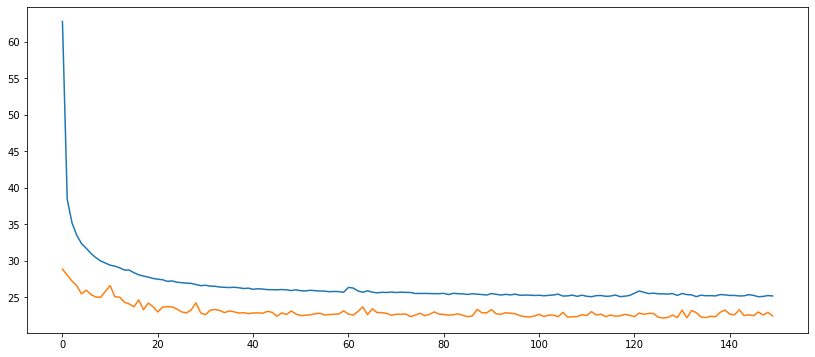

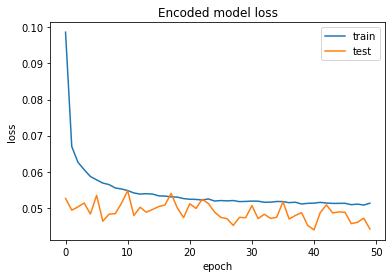

Overall accuracy of Convolutional Neural Network model: 0.9827813825454341


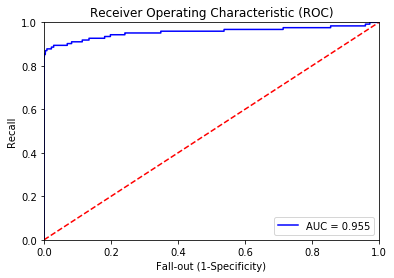

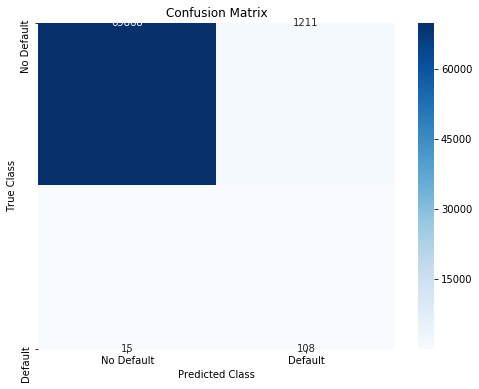

AUC(ROC): 0.9305056997727366
Precision: 0.08188021228203184
Recall: 0.8780487804878049
F1 score: 0.14979195561719832
False positives: 1211
True positives: 108
False negatives: 15
True negatives: 69868
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426472, 30)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

426472/426472 [==============================] - 24s 56us/step - loss: 18.5321 - rec_loss: 30.1326 - kl_loss: 4.8776 - val_loss: 14.2764 - val_rec_loss: 24.7613 - val_kl_loss: 2.8396
Epoch 17/150
426472/426472 [==============================] - 24s 57us/step - loss: 18.4215 - rec_loss: 29.9077 - kl_loss: 4.8932 - val_loss: 14.2650 - val_rec_loss: 24.6129 - val_kl_loss: 2.9658
Epoch 18/150
426472/426472 [==============================] - 24s 57us/step - loss: 18.3509 - rec_loss: 29.7377 - kl_loss: 4.9226 - val_loss: 14.2866 - val_rec_loss: 24.6741 - val_kl_loss: 2.9468
Epoch 19/150
426472/426472 [==============================] - 24s 56us/step - loss: 19.1248 - rec_loss: 31.3108 - kl_loss: 4.9279 - val_loss: 14.3737 - val_rec_loss: 24.9047 - val_kl_loss: 2.9098
Epoch 20/150
426472/426472 [==============================] - 24s 57us/step - loss: 19.2795 - rec_loss: 31.6310 - kl_loss: 4.9428 - val_loss: 14.2181 - val_rec_loss: 24.4887 - val_kl_loss: 3.0217
Epoch 21/150
426472/426472 [=====

Epoch 58/150
426472/426472 [==============================] - 24s 57us/step - loss: 17.8404 - rec_loss: 28.4388 - kl_loss: 5.2356 - val_loss: 13.8499 - val_rec_loss: 23.3329 - val_kl_loss: 3.3145
Epoch 59/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.8627 - rec_loss: 28.5027 - kl_loss: 5.2352 - val_loss: 13.8208 - val_rec_loss: 23.3601 - val_kl_loss: 3.2265
Epoch 60/150
426472/426472 [==============================] - 24s 55us/step - loss: 17.6873 - rec_loss: 28.1802 - kl_loss: 5.2149 - val_loss: 13.6095 - val_rec_loss: 22.9594 - val_kl_loss: 3.2074
Epoch 61/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.7267 - rec_loss: 28.2511 - kl_loss: 5.2265 - val_loss: 14.0814 - val_rec_loss: 23.8536 - val_kl_loss: 3.2495
Epoch 62/150
426472/426472 [==============================] - 24s 56us/step - loss: 18.1785 - rec_loss: 29.1437 - kl_loss: 5.2217 - val_loss: 14.1694 - val_rec_loss: 24.0628 - val_kl_loss: 3.2179
Epoch 63/150
426472/

Epoch 100/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.8839 - rec_loss: 26.6459 - kl_loss: 5.2095 - val_loss: 13.5232 - val_rec_loss: 22.7375 - val_kl_loss: 3.2604
Epoch 101/150
426472/426472 [==============================] - 24s 56us/step - loss: 17.0761 - rec_loss: 27.0253 - kl_loss: 5.2062 - val_loss: 13.5623 - val_rec_loss: 22.7689 - val_kl_loss: 3.2969
Epoch 102/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.9322 - rec_loss: 26.7247 - kl_loss: 5.2126 - val_loss: 13.5175 - val_rec_loss: 22.6490 - val_kl_loss: 3.3457
Epoch 103/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.8858 - rec_loss: 26.6487 - kl_loss: 5.2153 - val_loss: 13.9040 - val_rec_loss: 23.5730 - val_kl_loss: 3.1950
Epoch 104/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.9904 - rec_loss: 26.8523 - kl_loss: 5.2171 - val_loss: 13.7178 - val_rec_loss: 23.1899 - val_kl_loss: 3.1992
Epoch 105/150
4

426472/426472 [==============================] - 24s 56us/step - loss: 16.6645 - rec_loss: 26.3147 - kl_loss: 5.2219 - val_loss: 13.4842 - val_rec_loss: 22.7197 - val_kl_loss: 3.2803
Epoch 142/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.6240 - rec_loss: 26.2363 - kl_loss: 5.2204 - val_loss: 13.5196 - val_rec_loss: 22.6756 - val_kl_loss: 3.3784
Epoch 143/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.5781 - rec_loss: 26.1515 - kl_loss: 5.2194 - val_loss: 13.5543 - val_rec_loss: 22.7162 - val_kl_loss: 3.4225
Epoch 144/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.6019 - rec_loss: 26.2019 - kl_loss: 5.2220 - val_loss: 13.5104 - val_rec_loss: 22.6206 - val_kl_loss: 3.4295
Epoch 145/150
426472/426472 [==============================] - 24s 56us/step - loss: 16.5155 - rec_loss: 26.0405 - kl_loss: 5.2180 - val_loss: 13.4787 - val_rec_loss: 22.6744 - val_kl_loss: 3.3238
Epoch 146/150
426472/426472 [

Epoch 42/50
426472/426472 [==============================] - 79s 185us/step - loss: 0.0411 - accuracy: 0.9855 - val_loss: 0.0403 - val_accuracy: 0.9827
Epoch 43/50
426472/426472 [==============================] - 79s 185us/step - loss: 0.0411 - accuracy: 0.9856 - val_loss: 0.0406 - val_accuracy: 0.9825
Epoch 44/50
426472/426472 [==============================] - 77s 180us/step - loss: 0.0414 - accuracy: 0.9856 - val_loss: 0.0405 - val_accuracy: 0.9822
Epoch 45/50
426472/426472 [==============================] - 77s 180us/step - loss: 0.0416 - accuracy: 0.9856 - val_loss: 0.0407 - val_accuracy: 0.9824
Epoch 46/50
426472/426472 [==============================] - 79s 185us/step - loss: 0.0411 - accuracy: 0.9854 - val_loss: 0.0400 - val_accuracy: 0.9831
Epoch 47/50
426472/426472 [==============================] - 79s 185us/step - loss: 0.0412 - accuracy: 0.9854 - val_loss: 0.0447 - val_accuracy: 0.9808
Epoch 48/50
426472/426472 [==============================] - 79s 185us/step - loss: 0.04

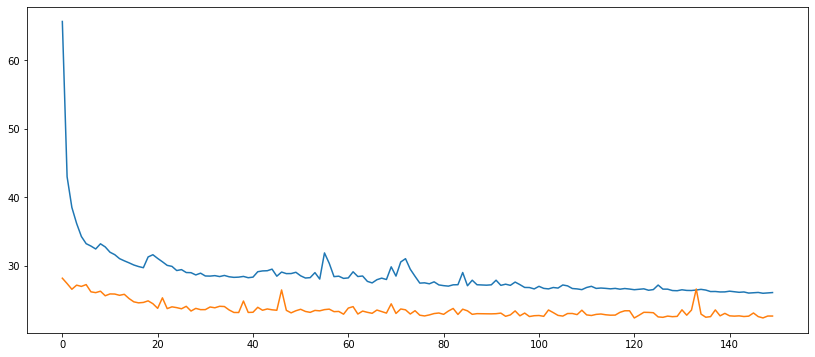

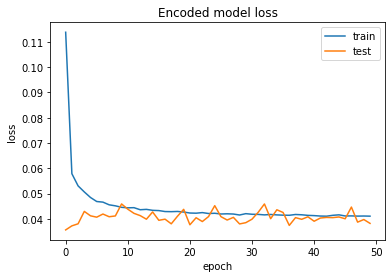

Overall accuracy of Convolutional Neural Network model: 0.9834555209123339


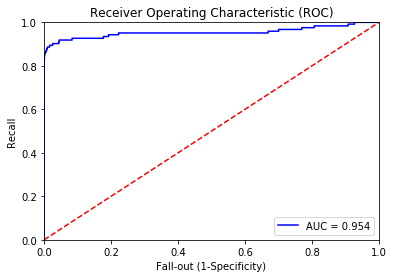

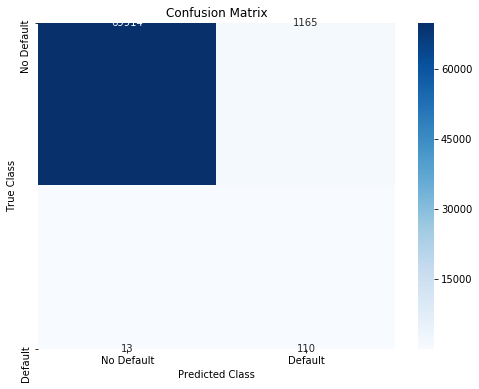

AUC(ROC): 0.9389593646917772
Precision: 0.08627450980392157
Recall: 0.8943089430894309
F1 score: 0.15736766809728184
False positives: 1165
True positives: 110
False negatives: 13
True negatives: 69914
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (426474, 30)
After OverSampling, the shape of train_y: (426474,) 

After OverSampling, counts of label '1': 213237
After OverSampling, counts of label '0': 213237
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

426474/426474 [==============================] - 21s 50us/step - loss: 19.5149 - rec_loss: 32.4283 - kl_loss: 4.6264 - val_loss: 16.5736 - val_rec_loss: 29.6068 - val_kl_loss: 2.6304
Epoch 17/150
426474/426474 [==============================] - 21s 50us/step - loss: 18.7934 - rec_loss: 31.0270 - kl_loss: 4.6276 - val_loss: 14.2571 - val_rec_loss: 24.9959 - val_kl_loss: 2.6286
Epoch 18/150
426474/426474 [==============================] - 21s 50us/step - loss: 18.4044 - rec_loss: 30.3170 - kl_loss: 4.6137 - val_loss: 15.1957 - val_rec_loss: 26.9032 - val_kl_loss: 2.6258
Epoch 19/150
426474/426474 [==============================] - 21s 50us/step - loss: 18.1098 - rec_loss: 29.7703 - kl_loss: 4.6064 - val_loss: 14.5184 - val_rec_loss: 25.5530 - val_kl_loss: 2.6419
Epoch 20/150
426474/426474 [==============================] - 23s 54us/step - loss: 18.2758 - rec_loss: 30.1494 - kl_loss: 4.6057 - val_loss: 14.4943 - val_rec_loss: 25.4328 - val_kl_loss: 2.6995
Epoch 21/150
426474/426474 [=====

Epoch 58/150
426474/426474 [==============================] - 22s 52us/step - loss: 16.7849 - rec_loss: 27.2495 - kl_loss: 4.8025 - val_loss: 13.5342 - val_rec_loss: 23.4962 - val_kl_loss: 2.8391
Epoch 59/150
426474/426474 [==============================] - 22s 51us/step - loss: 16.9367 - rec_loss: 27.5524 - kl_loss: 4.7989 - val_loss: 13.5096 - val_rec_loss: 23.4519 - val_kl_loss: 2.8007
Epoch 60/150
426474/426474 [==============================] - 22s 52us/step - loss: 16.6567 - rec_loss: 26.9907 - kl_loss: 4.8009 - val_loss: 13.5207 - val_rec_loss: 23.3908 - val_kl_loss: 2.9065
Epoch 61/150
426474/426474 [==============================] - 22s 52us/step - loss: 16.5985 - rec_loss: 26.9172 - kl_loss: 4.7852 - val_loss: 13.5983 - val_rec_loss: 23.7809 - val_kl_loss: 2.6991
Epoch 62/150
426474/426474 [==============================] - 22s 52us/step - loss: 16.5570 - rec_loss: 26.8328 - kl_loss: 4.7781 - val_loss: 13.6524 - val_rec_loss: 23.7161 - val_kl_loss: 2.8730
Epoch 63/150
426474/

Epoch 100/150
426474/426474 [==============================] - 23s 53us/step - loss: 17.5281 - rec_loss: 28.6890 - kl_loss: 4.7878 - val_loss: 14.2489 - val_rec_loss: 24.7268 - val_kl_loss: 2.9139
Epoch 101/150
426474/426474 [==============================] - 21s 50us/step - loss: 17.0115 - rec_loss: 27.6529 - kl_loss: 4.7832 - val_loss: 13.4120 - val_rec_loss: 23.1971 - val_kl_loss: 2.7712
Epoch 102/150
426474/426474 [==============================] - 21s 50us/step - loss: 16.8834 - rec_loss: 27.4085 - kl_loss: 4.7923 - val_loss: 13.3375 - val_rec_loss: 23.0580 - val_kl_loss: 2.7831
Epoch 103/150
426474/426474 [==============================] - 21s 50us/step - loss: 16.9623 - rec_loss: 27.5570 - kl_loss: 4.7936 - val_loss: 14.2145 - val_rec_loss: 24.8615 - val_kl_loss: 2.7333
Epoch 104/150
426474/426474 [==============================] - 21s 50us/step - loss: 18.0834 - rec_loss: 29.7445 - kl_loss: 4.8248 - val_loss: 13.4570 - val_rec_loss: 23.3428 - val_kl_loss: 2.7362
Epoch 105/150
4

426474/426474 [==============================] - 22s 52us/step - loss: 18.9887 - rec_loss: 31.4176 - kl_loss: 4.9216 - val_loss: 14.2025 - val_rec_loss: 24.7397 - val_kl_loss: 2.7685
Epoch 142/150
426474/426474 [==============================] - 21s 49us/step - loss: 18.4892 - rec_loss: 30.4568 - kl_loss: 4.8957 - val_loss: 18.4439 - val_rec_loss: 33.1081 - val_kl_loss: 2.8789
Epoch 143/150
426474/426474 [==============================] - 21s 49us/step - loss: 18.1715 - rec_loss: 29.8194 - kl_loss: 4.8927 - val_loss: 14.4757 - val_rec_loss: 25.2499 - val_kl_loss: 2.8151
Epoch 144/150
426474/426474 [==============================] - 21s 49us/step - loss: 17.6572 - rec_loss: 28.8193 - kl_loss: 4.8931 - val_loss: 21.3617 - val_rec_loss: 39.0286 - val_kl_loss: 2.8011
Epoch 145/150
426474/426474 [==============================] - 21s 49us/step - loss: 17.5523 - rec_loss: 28.6213 - kl_loss: 4.8895 - val_loss: 14.8331 - val_rec_loss: 26.0497 - val_kl_loss: 2.7576
Epoch 146/150
426474/426474 [

Epoch 42/50
426474/426474 [==============================] - 82s 193us/step - loss: 0.0488 - accuracy: 0.9820 - val_loss: 0.0495 - val_accuracy: 0.9790
Epoch 43/50
426474/426474 [==============================] - 82s 193us/step - loss: 0.0488 - accuracy: 0.9819 - val_loss: 0.0464 - val_accuracy: 0.9799
Epoch 44/50
426474/426474 [==============================] - 82s 193us/step - loss: 0.0491 - accuracy: 0.9820 - val_loss: 0.0534 - val_accuracy: 0.9776
Epoch 45/50
426474/426474 [==============================] - 82s 193us/step - loss: 0.0489 - accuracy: 0.9820 - val_loss: 0.0547 - val_accuracy: 0.9772
Epoch 46/50
426474/426474 [==============================] - 82s 193us/step - loss: 0.0489 - accuracy: 0.9819 - val_loss: 0.0545 - val_accuracy: 0.9776
Epoch 47/50
426474/426474 [==============================] - 82s 193us/step - loss: 0.0486 - accuracy: 0.9820 - val_loss: 0.0502 - val_accuracy: 0.9783
Epoch 48/50
426474/426474 [==============================] - 80s 187us/step - loss: 0.04

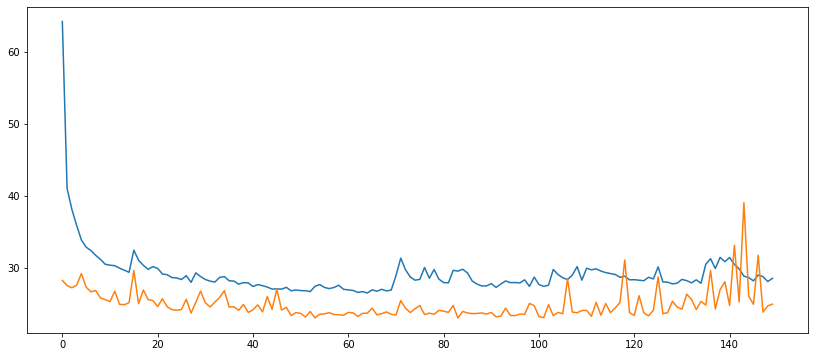

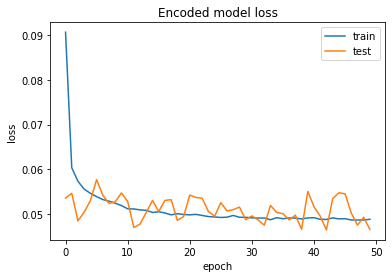

Overall accuracy of Convolutional Neural Network model: 0.9796491622308675


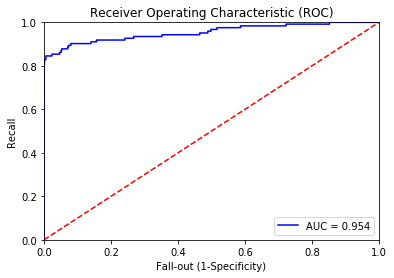

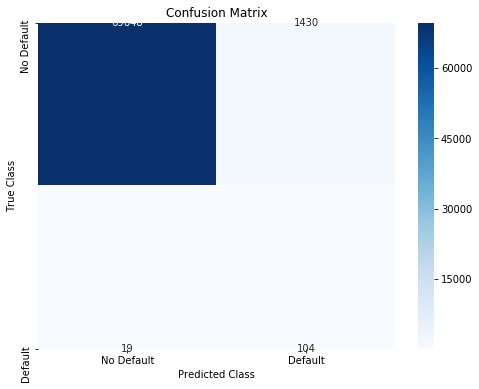

AUC(ROC): 0.9127048562474707
Precision: 0.06779661016949153
Recall: 0.8455284552845529
F1 score: 0.12552806276403136
False positives: 1430
True positives: 104
False negatives: 19
True negatives: 69648


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 69764.0
Average fp = 1314.75
Average fn = 15.5
Average tp = 107.5
Average Precision = 7.56%
Average Recall = 87.40%
Average F1 score = 13.91%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 279056
Total fp: 5259
 Total fn:62
 Total tp:430
Total Precision = 0.07558446124099139
Total Recall = 0.8739837398373984
Total F1_score = 0.1391360621258696
